In [5]:
library(car)
library(ggplot2)

In [1]:
data <- read.csv("data/laptops.csv", header = TRUE)

In [4]:
head(data)

,Price....,Screen.Size..in..,RAM.Memory..GB.,Hard.drive..GB.,USB.Ports,Brand,Weight..oz..
,<int>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
1,830,13.3,4,500,3,Toshiba,4.9
2,750,13.3,4,640,3,Toshiba,3.2
3,1200,11.6,2,128,2,Apple,2.3
4,1600,18.4,6,640,4,Toshiba,9.7
5,1900,18.4,8,500,4,Toshiba,9.7
6,530,14.0,4,500,2,Toshiba,5.0


On veut savoir quelles données influence le prix

On essay d'abord avec une regression simple avec les variables disque et prix

In [10]:
names(data) <- c("prix", "taille", "ram", "disque", "ports", "marque", "poids")

`geom_smooth()` using formula = 'y ~ x'


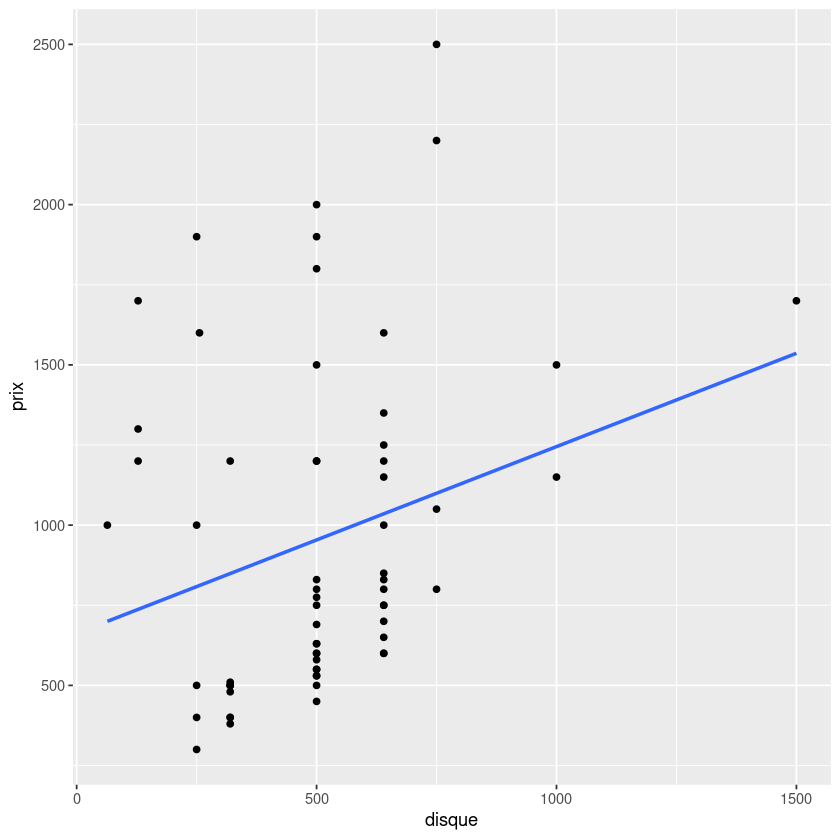

In [15]:
ggplot(data, aes(x = disque, y = prix)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

In [18]:
model1 <- lm(prix ~ disque, data = data)
summary(model1)


Call:
lm(formula = prix ~ disque, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-508.2 -361.4 -205.4  250.6 1400.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 662.6592   152.3335   4.350 5.27e-05 ***
disque        0.5824     0.2738   2.127   0.0375 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 498.2 on 61 degrees of freedom
Multiple R-squared:  0.06903,	Adjusted R-squared:  0.05377 
F-statistic: 4.523 on 1 and 61 DF,  p-value: 0.03749


le model est significatif 

donc on sait que la taille du disque influence le prix

Maintenant on va essayer de voir l'influence de beaucoup variables sur le prix


In [19]:
model2 <- lm(prix ~ disque + taille + poids + ports + ram, data = data)
summary(model2)


Call:
lm(formula = prix ~ disque + taille + poids + ports + ram, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-626.0 -350.6 -157.1  213.2 1404.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  761.4987   946.9539   0.804    0.425
disque         0.6561     0.4592   1.429    0.159
taille         4.1113    96.2063   0.043    0.966
poids         51.6251    99.2101   0.520    0.605
ports       -206.5346   123.5629  -1.671    0.100
ram           12.8642    74.4110   0.173    0.863

Residual standard error: 501.8 on 57 degrees of freedom
Multiple R-squared:  0.1173,	Adjusted R-squared:  0.03982 
F-statistic: 1.514 on 5 and 57 DF,  p-value: 0.1998


cette fois si le model n'est pas significatif, ni aucun des variables

il faut regarder l'erreur standard, si les valeurs sont trop élevés, donc on a une problème de multicolinéarité 

c'est t a dire que un ou plusieurs variables sont fortement corrèle, il fault q'on supprime un

In [20]:
# tes de correlation
vif(model2)

disque   taille    poids    ports      ram 
2.771311 5.704111 5.224199 1.837952 3.184779

si la valeur de vif depasse 5 comme dans la taille et le poids donc on a un probleme avec ses variables

matrice de correlation 

In [21]:
cor(data[, -6])

,prix,taille,ram,disque,ports,poids
prix,1.000000000,0.1559558,0.2239903,0.2627363,-0.006852006,0.1822440
taille,0.155955830,1.0000000,0.6461479,0.5604117,0.638096645,0.8952852
ram,0.223990296,0.6461479,1.0000000,0.7867273,0.533891680,0.6423917
disque,0.262736344,0.5604117,0.7867273,1.0000000,0.540017854,0.5520175
ports,-0.006852006,0.6380966,0.5338917,0.5400179,1.000000000,0.5857990
poids,0.182243965,0.8952852,0.6423917,0.5520175,0.585799030,1.0000000


In [23]:
# on peut voir la correlation avec : 
library(corrplot)

corrplot 0.92 loaded



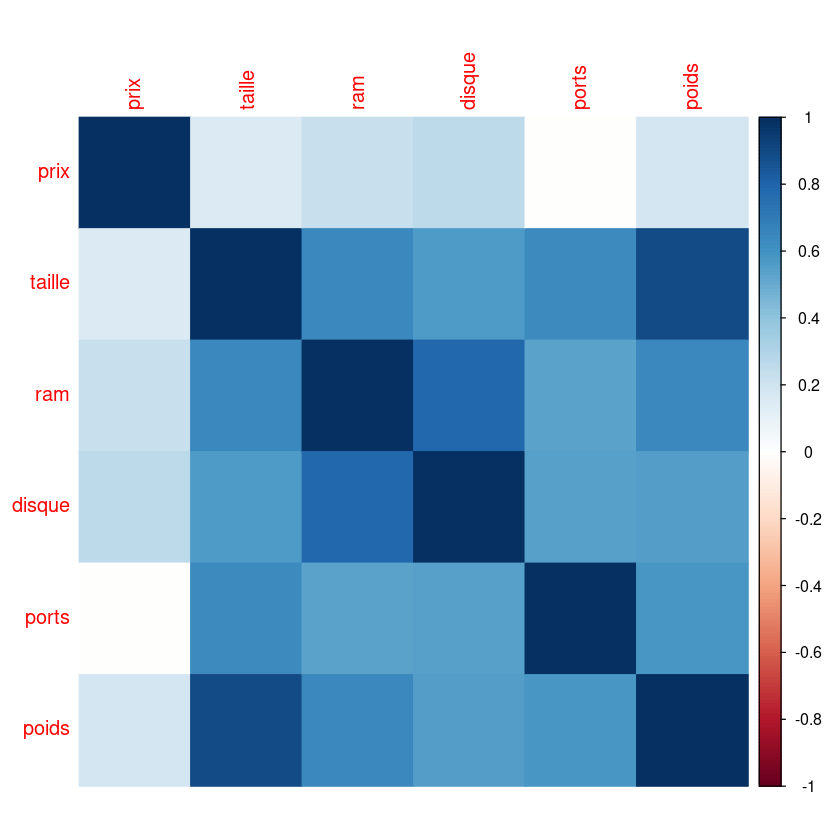

In [27]:
correlation_matrix <- cor(data[, -6])
corrplot(correlation_matrix, method = "color")


on voir une forte correlation entre la taille et le poids